<a href="https://colab.research.google.com/github/sondosmomanii/StrokeProject/blob/main/STROKEPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SONDOS MOMANY 159860**
***Binary Classification with a Tabular Stroke Prediction Dataset***.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/train.csv')

## EXPLORING THE DATA

In [ ]:
#Exploring the data.
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [ ]:
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,15304.0,NaN,NaN,NaN,7651.5,4418.028595,0.0,3825.75,7651.5,11477.25,15303.0
gender,15304,3,Female,9446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,15304.0,NaN,NaN,NaN,41.417708,21.444673,0.08,26.0,43.0,57.0,82.0
hypertension,15304.0,NaN,NaN,NaN,0.049726,0.217384,0.0,0.0,0.0,0.0,1.0
heart_disease,15304.0,NaN,NaN,NaN,0.023327,0.150946,0.0,0.0,0.0,0.0,1.0
ever_married,15304,2,Yes,10385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,15304,5,Private,9752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,15304,2,Rural,7664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,15304.0,NaN,NaN,NaN,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,NaN,NaN,NaN,28.112721,6.722315,10.3,23.5,27.6,32.0,80.1


In [ ]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

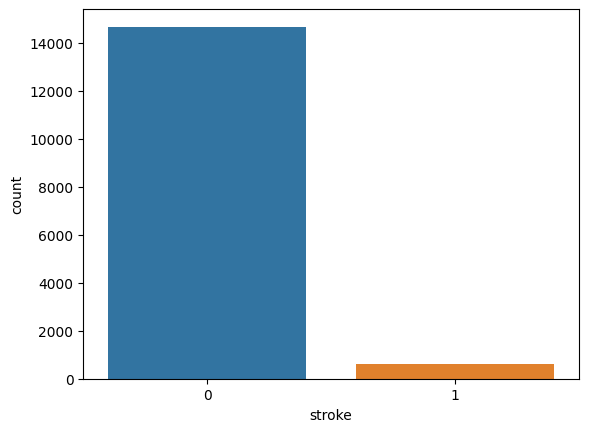

In [ ]:
# Visualizing the target variable
sns.countplot(x='stroke', data=df)
plt.show()

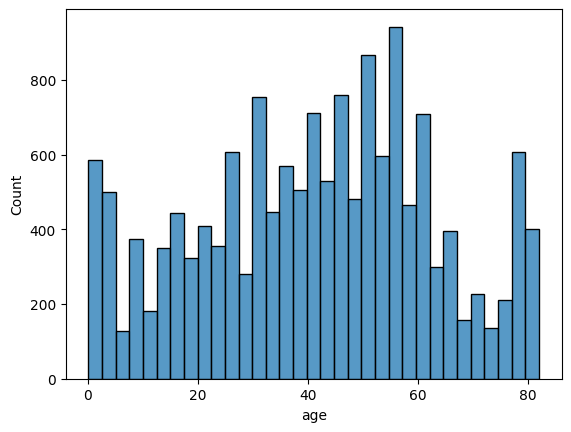

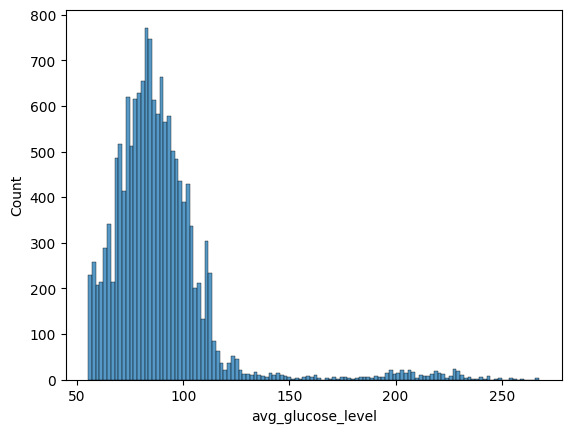

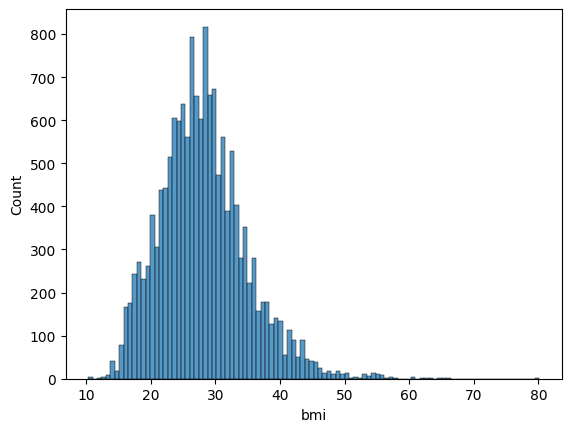

In [ ]:
# Visualizing the distribution of numerical variables
num_vars = ['age', 'avg_glucose_level', 'bmi']
for var in num_vars:
    sns.histplot(df[var], kde=False)
    plt.show()

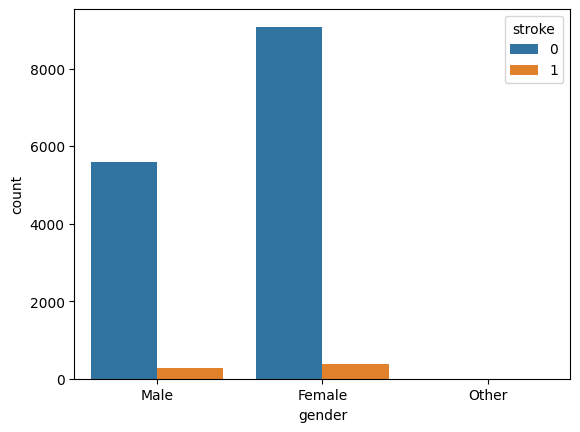

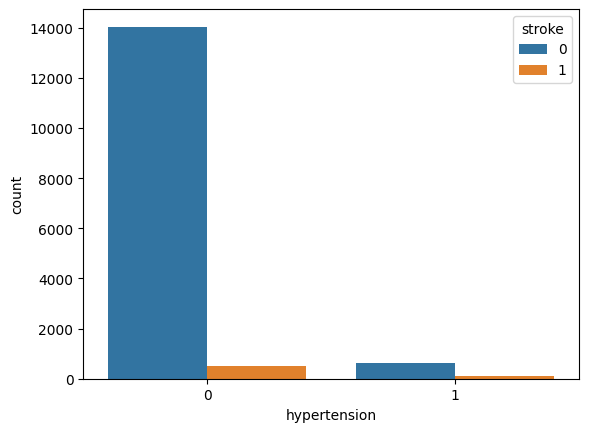

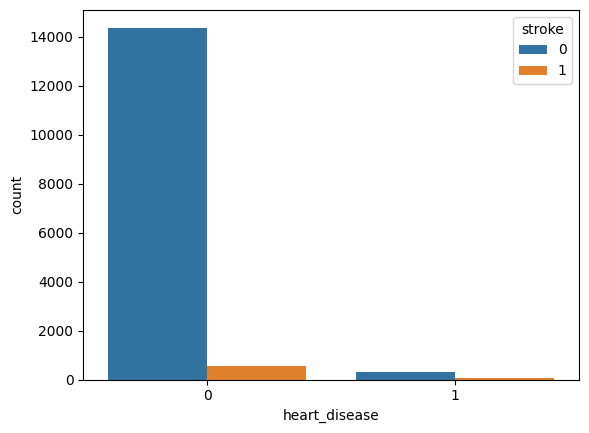

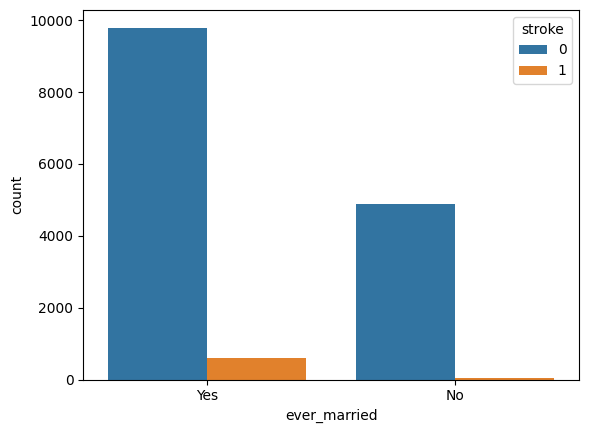

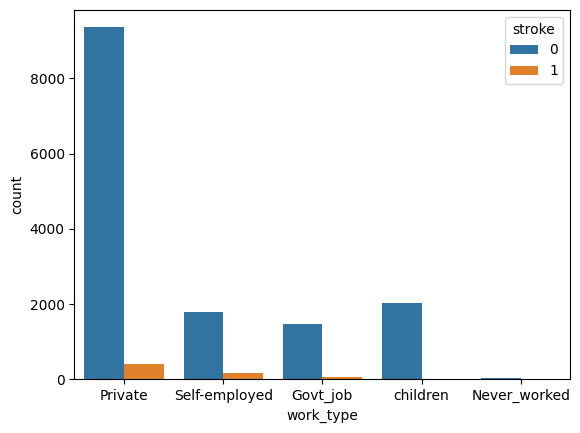

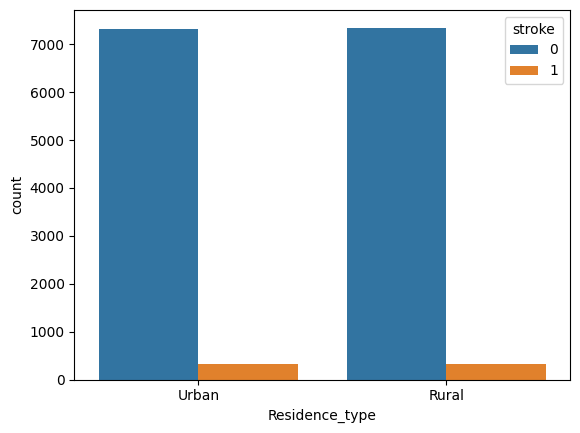

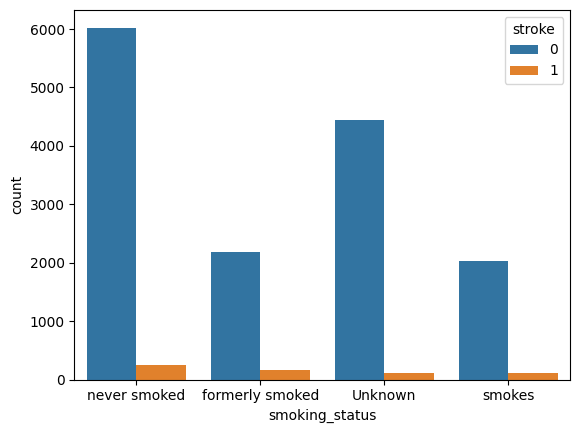

In [ ]:
# Visualizing the relationship between categorical variables and the target variable
cat_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for var in cat_vars:
    sns.countplot(x=var, hue='stroke', data=df)
    plt.show()

In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.003302,-0.012186,-0.005429,0.001450,-0.013436,-0.017290
age,-0.003302,1.000000,0.232629,0.193394,0.108897,0.390721,0.261320
hypertension,-0.012186,0.232629,1.000000,0.074178,0.122834,0.106665,0.145895
heart_disease,-0.005429,0.193394,0.074178,1.000000,0.137147,0.054583,0.111518
avg_glucose_level,0.001450,0.108897,0.122834,0.137147,1.000000,0.108142,0.149273
bmi,-0.013436,0.390721,0.106665,0.054583,0.108142,1.000000,0.065393
stroke,-0.017290,0.261320,0.145895,0.111518,0.149273,0.065393,1.000000


<ipython-input-15-aad8acaf6169>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


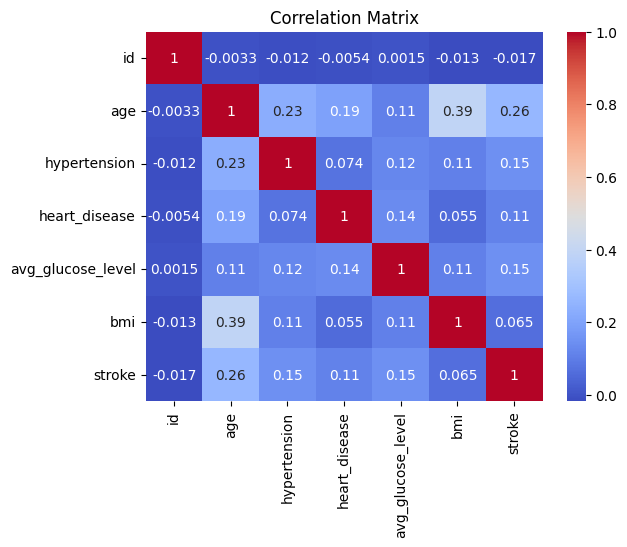

In [ ]:
corr_matrix = df.corr()
# Plotting the correlation matrix using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Identify missing values
missing_values = df.isnull().sum()

In [ ]:
df = df.dropna()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['heart_disease'].value_counts()

0    14947
1      357
Name: heart_disease, dtype: int64

In [ ]:
df['hypertension'].value_counts()

0    14543
1      761
Name: hypertension, dtype: int64

### **MODELS**

### **DECISION** **TREE** 

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [ ]:
# Split the dataset into features and target
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dcl = DecisionTreeClassifier()

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
# Perform 3-fold cross-validation and printing the results
scores = cross_val_score(dcl, X, y, cv=kf)
print("Accuracy scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Accuracy scores: [0.9245394  0.9274652  0.93315036]
Mean accuracy: 0.9283849872968494
Standard deviation: 0.0035750699674977054


In [ ]:
# Create the decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# Train the decision tree classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# Make the predictions on the testing set
y_pred = dt.predict(X_test)

In [ ]:
# Evaluate the performance of the decision tree classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2941    0]
 [ 120    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2941
           1       0.00      0.00      0.00       120

    accuracy                           0.96      3061
   macro avg       0.48      0.50      0.49      3061
weighted avg       0.92      0.96      0.94      3061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Create the SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=0)

In [ ]:
# Fit the SVM classifier on training data
svm.fit(X_train, y_train)
# Make predictions on testing data
y_pred = svm.predict(X_test)

In [ ]:
# Compute the accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:\n", cm)

Accuracy: 0.9552433845148645
Confusion matrix:
 [[2915   26]
 [ 111    9]]


# K Neighbors Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/My Drive/train.csv')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the K Nearest Neighbors Classifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Test the model on  testing set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9552433845148645


# **Multinomial Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
# Remove missing values
df = df.dropna()

# Split the data into features and target
X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Test the model on the testing set
y_pred = mnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8121528912120222


## **RandomForestClassifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Remove missing values
df = df.dropna()

# Encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Split the data into features and target
X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Test the model on the testing set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.957530218882718


In [ ]:
# Analyze feature importance
importances = rf.feature_importances_
feature_names = X.columns.tolist()

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

print(feature_importances)

              feature  importance
0   avg_glucose_level    0.224239
1                 age    0.219662
2                  id    0.196474
3                 bmi    0.183131
4      smoking_status    0.052197
5           work_type    0.031358
6      Residence_type    0.025618
7              gender    0.024316
8        hypertension    0.019552
9       heart_disease    0.013018
10       ever_married    0.010436


# **XBoost Classifier **

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
# Drop ID column
df.drop('id', axis=1, inplace=True)

# Fill missing values in BMI column with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training the XGBoost classifier
xgb = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
xgb.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = xgb.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9545900032669062


# **Addressing the Imbalanced Data.**

In [ ]:
#In the Stroke Prediction Dataset, the number of positive cases (people who had stroke) is lower than the number of negative cases (people who didn't have stroke).
 #This creates an imbalanced dataset which can affect the performance of the machine learning models.

In [ ]:
#USING SMOTE TECHNIQUE 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/My Drive/train.csv')

In [ ]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
print('Original dataset shape:', y_train.shape)
print('Resampled dataset shape:', y_train_resampled.shape)
print('Number of positive cases (stroke):', sum(y_train_resampled==1))
print('Number of negative cases (no stroke):', sum(y_train_resampled==0))


Original dataset shape: (12243,)
Resampled dataset shape: (23482,)
Number of positive cases (stroke): 11741
Number of negative cases (no stroke): 11741


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2931
           1       0.17      0.30      0.21       130

    accuracy                           0.91      3061
   macro avg       0.57      0.62      0.58      3061
weighted avg       0.93      0.91      0.92      3061



# **PCA to reduce dimensions**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Instantiate PCA with n_components=10
pca = PCA(n_components=10)

# Fit PCA to the normalized features
pca.fit(X_norm)

# Transform the features to the new subspace
X_pca = pca.transform(X_norm)


# TEST PREPROCESSING

In [ ]:
test = pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
test = pd.get_dummies(test)
test

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,15304,57.0,0,0,82.54,33.4,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,15305,70.0,1,0,72.06,28.5,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
2,15306,5.0,0,0,103.72,19.5,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,15307,56.0,0,0,69.24,41.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,15308,32.0,0,0,111.15,30.1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,27.0,0,0,75.77,17.6,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
10200,25504,49.0,0,0,102.91,26.7,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
10201,25505,3.0,0,0,104.04,18.3,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
10202,25506,31.0,0,0,82.41,28.7,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# Remove rows with NaN values.
#test.dropna(inplace=True)
# fill NaN values with a specific value
test.fillna(value=0, inplace=True)

In [ ]:
# For Submission.
id = test['id']
test.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,15304,57.0,0,0,82.54,33.4,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,15305,70.0,1,0,72.06,28.5,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
2,15306,5.0,0,0,103.72,19.5,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,15307,56.0,0,0,69.24,41.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,15308,32.0,0,0,111.15,30.1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10204 non-null  int64  
 1   age                             10204 non-null  float64
 2   hypertension                    10204 non-null  int64  
 3   heart_disease                   10204 non-null  int64  
 4   avg_glucose_level               10204 non-null  float64
 5   bmi                             10204 non-null  float64
 6   gender_Female                   10204 non-null  uint8  
 7   gender_Male                     10204 non-null  uint8  
 8   gender_Other                    10204 non-null  uint8  
 9   ever_married_No                 10204 non-null  uint8  
 10  ever_married_Yes                10204 non-null  uint8  
 11  work_type_Govt_job              10204 non-null  uint8  
 12  work_type_Never_worked          

## **Submit**

In [ ]:
import pandas as pd

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
# Perform necessary preprocessing steps on the test dataset.
# Making sure the test dataset has the same structure and features as the training set.

In [ ]:
# The relevant features for prediction.
test_features = test_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'work_type', 'Residence_type', 'gender', 'ever_married']]

In [ ]:
# Perform one-hot encoding for categorical features
test_features_encoded = pd.get_dummies(test_features)

In [ ]:
# Get missing columns in the test dataset compared to the training dataset
missing_cols = set(X_train.columns) - set(test_features_encoded.columns)
for col in missing_cols:
    test_features_encoded[col] = 0

In [ ]:
# Check the order of columns in the test dataset matches the order in the training dataset
test_features_encoded = test_features_encoded.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
 #Generate predictions for the preprocessed test dataset using trained model
test_predictions = rf.predict(test_features_encoded)  

In [ ]:
# Create a submission DataFrame
submission_df = pd.DataFrame({'id': test_data['id'], 'stroke': test_predictions})

# Save the submission DataFrame as a CSV file
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      10204 non-null  int64
 1   stroke  10204 non-null  int64
dtypes: int64(2)
memory usage: 159.6 KB


In [154]:
import os
# Get the current working directory
current_directory = os.getcwd()

# Concatenate the filename to the current directory
submission_file_path = '/content/drive/MyDrive/submission.csv'


from google.colab import files
files.download('submission.csv')


# Print the file path
print("Submission file path:", submission_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Submission file path: /content/drive/MyDrive/submission.csv
